In [15]:
import requests
import pandas as pd
import numpy as np
import json 
import pprint
import matplotlib.pyplot as plt

DEFINE FUNCTIONS 

Function to get history dataframe

In [22]:
def get_hst(list): # Function retrieves data on coins from coingecko API for a given list of coinnames
    d = []
    for x in list: 
        s = 'https://api.coingecko.com/api/v3/coins/' + x + '/market_chart?vs_currency=usd&days=90&interval=daily'
        r = requests.get(s, headers = {'accept':'application/json'})
        r = json.loads(r.text)
        r = r['prices']
        hst = [y[1] for y in r]
        d.append(hst)
    # This section of code eletes first items of longer lists because not all coins have been around for the
    # same amount of time, so taht covariance extraction is made possible. 
    l = min(map(len, d))
    for x in d:
        y = len(x)
        if  y > l:
            del x[:y-l]            
        else:
            pass
        
    d = np.array(d)
    d = d.T
    d = pd.DataFrame(d, columns = list)
    return d

Function to get returns, mean returns, returns distribution, covariance matrix

In [17]:
def get_stats(df): #this function retrieves mean returns and covariance matrix of the dataframe
    ret = df.pct_change()
    sd = np.std(ret)
    mret = ret.mean()
    covM = ret.cov()
    return ret, mret, sd, covM

Functions to get the volatility and returns

In [18]:
def get_vol(weights, cov):
    return np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

def get_volt(wieghts, cov, T):
    return get_vol(weights, cov) * np.sqrt(T)
    
def get_returns(mret, weights, T):
    return (np.dot(mret, weights.T) + 1) **T  

In [19]:
## Change coin names and weights to fit your desired portfolio!
coins = ["bitcoin", "ethereum", "cardano","dogecoin"]
weights = np.array([0.5,0.2,0.2,0.1])

df = get_hst(coins)

ret, mret, sd, covM = get_stats(df)

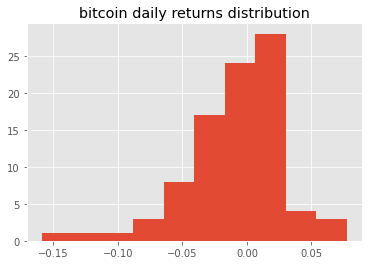

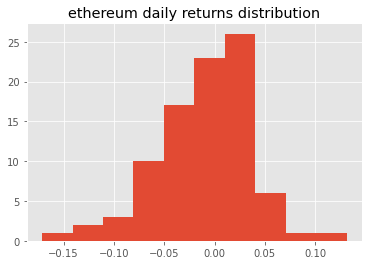

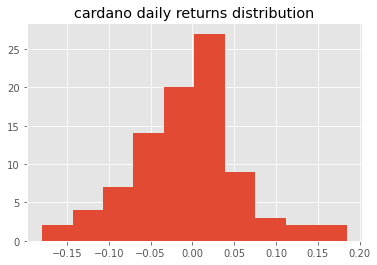

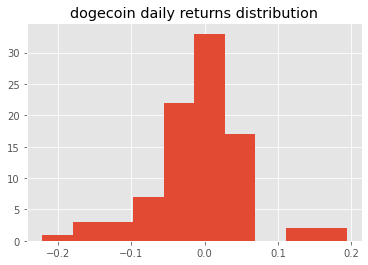

In [20]:
for x in coins:
    coin_hst = list(ret[x])
    plt.style.use('ggplot')
    plt.hist(coin_hst, bins=10)
    y = x + " daily returns distribution"
    plt.title(y)
    plt.show()

In [25]:
T = 90
###
print('the volatility of your portfolio over the last 90 days is:  ' + str(get_volt(weights, covM, T)))
print('the expected returns of your portfolio are:  ' + str(get_returns(mret, weights, T)))

the volatility of your portfolio over the last 90 days is:  0.4224507297523766
the expected returns of your portfolio are:  0.5204592808527991
